This exercise will require you to pull some data from https://data.nasdaq.com/ (formerly Quandl API).

As a first step, you will need to register a free account on the https://data.nasdaq.com/ website.

After you register, you will be provided with a unique API key, that you should store:

*Note*: Use a `.env` file and put your key in there and `python-dotenv` to access it in this notebook. 

The code below uses a key that was used when generating this project but has since been deleted. Never submit your keys to source control. There is a `.env-example` file in this repository to illusrtate what you need. Copy that to a file called `.env` and use your own api key in that `.env` file. Make sure you also have a `.gitignore` file with a line for `.env` added to it. 

The standard Python gitignore is [here](https://github.com/github/gitignore/blob/master/Python.gitignore) you can just copy that. 

In [1]:
# get api key from your .env file
import os
from dotenv import load_dotenv

load_dotenv()
API_KEY = os.getenv('NASDAQ_API_KEY')

print(API_KEY)

NfRhNo62kLPD3UBs39ne


Nasdaq Data has a large number of data sources, but, unfortunately, most of them require a Premium subscription. Still, there are also a good number of free datasets.

For this mini project, we will focus on equities data from the Frankfurt Stock Exhange (FSE), which is available for free. We'll try and analyze the stock prices of a company called Carl Zeiss Meditec, which manufactures tools for eye examinations, as well as medical lasers for laser eye surgery: https://www.zeiss.com/meditec/int/home.html. The company is listed under the stock ticker AFX_X.

You can find the detailed Nasdaq Data API instructions here: https://docs.data.nasdaq.com/docs/in-depth-usage

While there is a dedicated Python package for connecting to the Nasdaq API, we would prefer that you use the *requests* package, which can be easily downloaded using *pip* or *conda*. You can find the documentation for the package here: http://docs.python-requests.org/en/master/ 

Finally, apart from the *requests* package, you are encouraged to not use any third party Python packages, such as *pandas*, and instead focus on what's available in the Python Standard Library (the *collections* module might come in handy: https://pymotw.com/3/collections/).
Also, since you won't have access to DataFrames, you are encouraged to us Python's native data structures - preferably dictionaries, though some questions can also be answered using lists.
You can read more on these data structures here: https://docs.python.org/3/tutorial/datastructures.html

Keep in mind that the JSON responses you will be getting from the API map almost one-to-one to Python's dictionaries. Unfortunately, they can be very nested, so make sure you read up on indexing dictionaries in the documentation provided above.

In [2]:
# First, import the relevant modules
import requests
import pandas as pd

Note: API's can change a bit with each version, for this exercise it is reccomended to use the nasdaq api at `https://data.nasdaq.com/api/v3/`. This is the same api as what used to be quandl so `https://www.quandl.com/api/v3/` should work too.

Hint: We are looking for the `AFX_X` data on the `datasets/FSE/` dataset.

In [3]:
# Now, call the Nasdaq API and pull out a small sample of the data (only one day) to get a glimpse
# into the JSON structure that will be returned
url = f'https://data.nasdaq.com/api/v3/datasets/FSE/AFX_X.json?start_date=2019-11-10&end_date=2019-11-11&collapse&api_key={API_KEY}'

r = requests.get(url)
r.json()
# Inspect the JSON structure of the object you created, and take note of how nested it is,
# as well as the overall structure

{'dataset': {'id': 10095370,
  'dataset_code': 'AFX_X',
  'database_code': 'FSE',
  'name': 'Carl Zeiss Meditec (AFX_X)',
  'description': 'Stock Prices for Carl Zeiss Meditec (2020-11-02) from the Frankfurt Stock Exchange.<br><br>Trading System: Xetra<br><br>ISIN: DE0005313704',
  'refreshed_at': '2020-12-01T14:48:09.907Z',
  'newest_available_date': '2020-12-01',
  'oldest_available_date': '2000-06-07',
  'column_names': ['Date',
   'Open',
   'High',
   'Low',
   'Close',
   'Change',
   'Traded Volume',
   'Turnover',
   'Last Price of the Day',
   'Daily Traded Units',
   'Daily Turnover'],
  'frequency': 'daily',
  'type': 'Time Series',
  'premium': False,
  'limit': None,
  'transform': None,
  'column_index': None,
  'start_date': '2019-11-10',
  'end_date': '2019-11-11',
  'data': [['2019-11-11',
    102.1,
    103.8,
    100.6,
    100.8,
    None,
    95512.0,
    9684446.0,
    None,
    None,
    None]],
  'collapse': None,
  'order': None,
  'database_id': 6129}}

These are your tasks for this mini project:

1. Collect data from the Franfurt Stock Exchange, for the ticker AFX_X, for the whole year 2017 (keep in mind that the date format is YYYY-MM-DD).
2. Convert the returned JSON object into a Python dictionary.
3. Calculate what the highest and lowest opening prices were for the stock in this period.
4. What was the largest change in any one day (based on High and Low price)?
5. What was the largest change between any two days (based on Closing Price)?
6. What was the average daily trading volume during this year?
7. (Optional) What was the median trading volume during this year. (Note: you may need to implement your own function for calculating the median.)

In [4]:
url = f'https://data.nasdaq.com/api/v3/datasets/FSE/AFX_X.json?start_date=2017-01-01&end_date=2017-12-31&api_key={API_KEY}'

In [5]:
r = requests.get(url)
r_dict = r.json()
r_dict

{'dataset': {'id': 10095370,
  'dataset_code': 'AFX_X',
  'database_code': 'FSE',
  'name': 'Carl Zeiss Meditec (AFX_X)',
  'description': 'Stock Prices for Carl Zeiss Meditec (2020-11-02) from the Frankfurt Stock Exchange.<br><br>Trading System: Xetra<br><br>ISIN: DE0005313704',
  'refreshed_at': '2020-12-01T14:48:09.907Z',
  'newest_available_date': '2020-12-01',
  'oldest_available_date': '2000-06-07',
  'column_names': ['Date',
   'Open',
   'High',
   'Low',
   'Close',
   'Change',
   'Traded Volume',
   'Turnover',
   'Last Price of the Day',
   'Daily Traded Units',
   'Daily Turnover'],
  'frequency': 'daily',
  'type': 'Time Series',
  'premium': False,
  'limit': None,
  'transform': None,
  'column_index': None,
  'start_date': '2017-01-01',
  'end_date': '2017-12-31',
  'data': [['2017-12-29',
    51.76,
    51.94,
    51.45,
    51.76,
    None,
    34640.0,
    1792304.0,
    None,
    None,
    None],
   ['2017-12-28',
    51.65,
    51.82,
    51.43,
    51.6,
    None

In [6]:
carlZeissStockPrice = pd.DataFrame(r_dict['dataset']['data'], columns=['Date',
   'Open',
   'High',
   'Low',
   'Close',
   'Change',
   'Traded Volume',
   'Turnover',
   'Last Price of the Day',
   'Daily Traded Units',
   'Daily Turnover'])
carlZeissStockPrice

,Date,Open,High,Low,Close,Change,Traded Volume,Turnover,Last Price of the Day,Daily Traded Units,Daily Turnover
0,2017-12-29,51.76,51.94,51.45,51.76,NaN,34640.0,1792304.0,None,None,None
1,2017-12-28,51.65,51.82,51.43,51.60,NaN,40660.0,2099024.0,None,None,None
2,2017-12-27,51.45,51.89,50.76,51.82,NaN,57452.0,2957018.0,None,None,None
3,2017-12-22,51.05,51.50,50.92,51.32,NaN,71165.0,3641949.0,None,None,None
4,2017-12-21,51.16,51.52,50.90,51.40,NaN,120649.0,6179433.0,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
250,2017-01-06,34.91,35.21,34.91,35.04,NaN,27507.0,964046.0,None,None,None
251,2017-01-05,35.02,35.20,34.73,35.06,NaN,48412.0,1692326.0,None,None,None
252,2017-01-04,35.48,35.51,34.75,35.19,NaN,54408.0,1906810.0,None,None,None
253,2017-01-03,35.90,35.93,35.34,35.48,NaN,70618.0,2515473.0,None,None,None


In [7]:
# Sorted data to align with dates, reset indcies, dropped Empty Columns
carlZeissStockPrice.sort_values('Date', inplace=True)
carlZeissStockPrice.reset_index(drop=True, inplace=True)
carlZeissStockPrice.drop(columns=['Change', 'Last Price of the Day', 'Daily Traded Units', 'Daily Turnover'], inplace=True)
carlZeissStockPrice


,Date,Open,High,Low,Close,Traded Volume,Turnover
0,2017-01-02,34.99,35.94,34.99,35.80,44700.0,1590561.0
1,2017-01-03,35.90,35.93,35.34,35.48,70618.0,2515473.0
2,2017-01-04,35.48,35.51,34.75,35.19,54408.0,1906810.0
3,2017-01-05,35.02,35.20,34.73,35.06,48412.0,1692326.0
4,2017-01-06,34.91,35.21,34.91,35.04,27507.0,964046.0
...,...,...,...,...,...,...,...
250,2017-12-21,51.16,51.52,50.90,51.40,120649.0,6179433.0
251,2017-12-22,51.05,51.50,50.92,51.32,71165.0,3641949.0
252,2017-12-27,51.45,51.89,50.76,51.82,57452.0,2957018.0
253,2017-12-28,51.65,51.82,51.43,51.60,40660.0,2099024.0


In [8]:
#Carl Zeiss 2017 Highest Opening Price
carlZeissStockPrice['Open'].max()

53.11

In [9]:
#Carl Zeiss 2017 lowest Opening Price
carlZeissStockPrice['Open'].min()

34.0

In [10]:
carlZeissStockPrice['High']/carlZeissStockPrice['Low'] - 1 #Pct_change formula: results are in (%)

0      0.027151
1      0.016695
2      0.021871
3      0.013533
4      0.008594
         ...   
250    0.012181
251    0.011390
252    0.022262
253    0.007583
254    0.009524
Length: 255, dtype: float64

In [13]:
# 4. What was the largest change in any one day (based on High and Low price)?
carlZeissStockPrice['Daily Low-to-High % Change'] = carlZeissStockPrice['High']/carlZeissStockPrice['Low'] - 1
carlZeissStockPrice['Daily Low-to-High % Change'].max()

0.06497109826589598

In [14]:
carlZeissStockPrice.head()

,Date,Open,High,Low,Close,Traded Volume,Turnover,Daily Low-to-High % Change
0,2017-01-02,34.99,35.94,34.99,35.80,44700.0,1590561.0,0.027151
1,2017-01-03,35.90,35.93,35.34,35.48,70618.0,2515473.0,0.016695
2,2017-01-04,35.48,35.51,34.75,35.19,54408.0,1906810.0,0.021871
3,2017-01-05,35.02,35.20,34.73,35.06,48412.0,1692326.0,0.013533
4,2017-01-06,34.91,35.21,34.91,35.04,27507.0,964046.0,0.008594


In [16]:
# Calculating % Change
carlZeissStockPrice['Close'].pct_change()*100

0           NaN
1     -0.893855
2     -0.817362
3     -0.369423
4     -0.057045
         ...   
250    0.253560
251   -0.155642
252    0.974279
253   -0.424547
254    0.310078
Name: Close, Length: 255, dtype: float64

In [17]:
carlZeissStockPrice['% Change (Close)'] = carlZeissStockPrice['Close'].pct_change()*100

In [18]:
# 5. What was the largest change between any two days (based on Closing Price)?
max(
    abs(carlZeissStockPrice['% Change (Close)'].max()), 
    abs(carlZeissStockPrice['% Change (Close)'].min())
    )

5.769664187514079

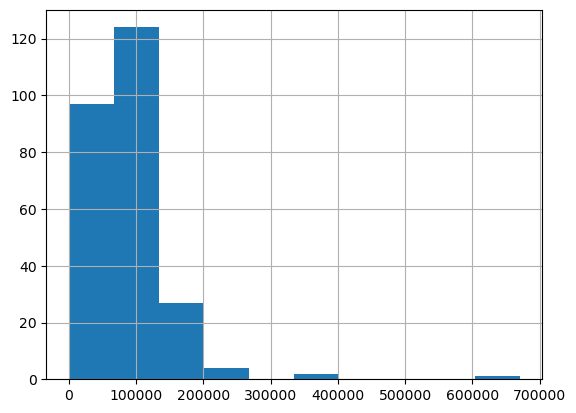

In [19]:
import matplotlib.pyplot as plt
carlZeissStockPrice['Traded Volume'].hist()
plt.show()

# Seem like there's some outliers so maybe a median would be more representataive of the mean

In [21]:
# 6. What was the average daily trading volume during this year?
carlZeissStockPrice['Traded Volume'].median(), carlZeissStockPrice['Traded Volume'].mean()

(76286.0, 89124.33725490196)

In [22]:
# 7. (Optional) What was the median trading volume during this year. (Note: you may need to implement your own function for calculating the median.)
carlZeissStockPrice['Traded Volume'].median()

76286.0